In [1]:
%matplotlib notebook
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = "./data/mastarall-v2_4_3-v1_0_2.fits"
extname = "GOODSTARS"
T = Table.read(filename, hdu=extname)

In [3]:
g = T['PSFMAG'][:, 1]
r = T['PSFMAG'][:, 2]
tt = T['INPUT_TEFF']
keep = g != -999
keep = np.logical_and(keep, (r != -999))
keep = np.logical_and(keep, (tt != -999))

g = g[keep]
r = r[keep]
tt = tt[keep]

In [6]:
#https://www.sdss.org/dr15/mastar/mastar-catalogs/

In [7]:
import scipy as sp

In [8]:
color = g-r

In [20]:
PF = np.polyfit(color, tt,4)  # I do not in a million years believe this is really a 4th order polynomial.
xrange = np.arange(-0.5, 2.0, 0.1)
teff = np.poly1d(PF)

<IPython.core.display.Javascript object>


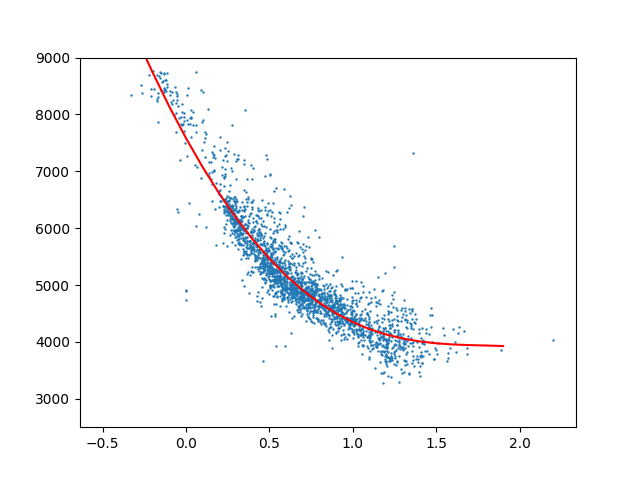

(2500, 9000)

In [21]:
plt.scatter(g - r, tt, s=0.5)
plt.plot(xrange, teff(xrange), color='red')
plt.ylim(2500, 9000)